In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive

In [ ]:
#drive.mount('/content/CKD_Preprocessed.csv')

In [ ]:
df= pd.read_csv('/content/CKD_Preprocessed.csv')

In [ ]:
df.dtypes

Age (yrs)                         float64
Blood Pressure (mm/Hg)              int64
Specific Gravity                  float64
Albumin                           float64
Sugar                               int64
Blood Glucose Random (mgs/dL)     float64
Blood Urea                        float64
Serum Creatinine                  float64
Sodium                            float64
Potassium                         float64
Hemoglobin (gms)                  float64
Packed Cell Volume                float64
White Blood Cells (cells/cmm)     float64
Red Blood Cells (millions/cmm)    float64
Red Blood Cells: normal             int64
Pus Cells: normal                   int64
Pus Cell Clumps: present            int64
Bacteria: present                   int64
Hypertension: yes                   int64
Diabetes Mellitus: yes              int64
Coronary Artery Disease: yes        int64
Appetite: poor                      int64
Pedal Edema: yes                    int64
Anemia: yes                       

In [ ]:
df.isna().sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea                        0
Serum Creatinine                  0
Sodium                            0
Potassium                         0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Red Blood Cells: normal           0
Pus Cells: normal                 0
Pus Cell Clumps: present          0
Bacteria: present                 0
Hypertension: yes                 0
Diabetes Mellitus: yes            0
Coronary Artery Disease: yes      0
Appetite: poor                    0
Pedal Edema: yes                  0
Anemia: yes                       0
Chronic Kidney Disease: yes       0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    int64  
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    int64  
 5   Blood Glucose Random (mgs/dL)   400 non-null    float64
 6   Blood Urea                      400 non-null    float64
 7   Serum Creatinine                400 non-null    float64
 8   Sodium                          400 non-null    float64
 9   Potassium                       400 non-null    float64
 10  Hemoglobin (gms)                400 non-null    float64
 11  Packed Cell Volume              400 non-null    float64
 12  White Blood Cells (cells/cmm)   400 

In [ ]:
#df['Chronic Kidney Disease: yes'] = df['Chronic Kidney Disease: yes'].map({0:0,1:1})
df.columns=[c.replace(' ','_') for c in df.columns]
df.columns=[c.replace(':','_') for c in df.columns]

In [ ]:
# count_disease=pd.value_counts(df['Chronic_Kidney_Disease__yes'],sort=True)
# count_disease.plot(kind='bar',rot=0)
# plt.xticks(range(2),labels=[0,1])
# plt.xlabel("Chronic Kidney Disease")
# plt.ylabel("Frequency")
# df.Chronic_Kidney_Disease__yes.value_counts()
df['Chronic_Kidney_Disease__yes'].value_counts()
#sns.countplot(df['Chronic_Kidney_Disease__yes'])

1    250
0    150
Name: Chronic_Kidney_Disease__yes, dtype: int64

In [ ]:
X=df.drop(['Chronic_Kidney_Disease__yes'],axis=1)
y=df['Chronic_Kidney_Disease__yes']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
#f, ax = plt.subplots(figsize=(20, 10))
#plt.title('Correlation matrix')
# Draw the heatmap using seaborn
#sns.heatmap(df.drop(['Chronic_Kidney_Disease__yes'],axis=1).astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

<Axes: >

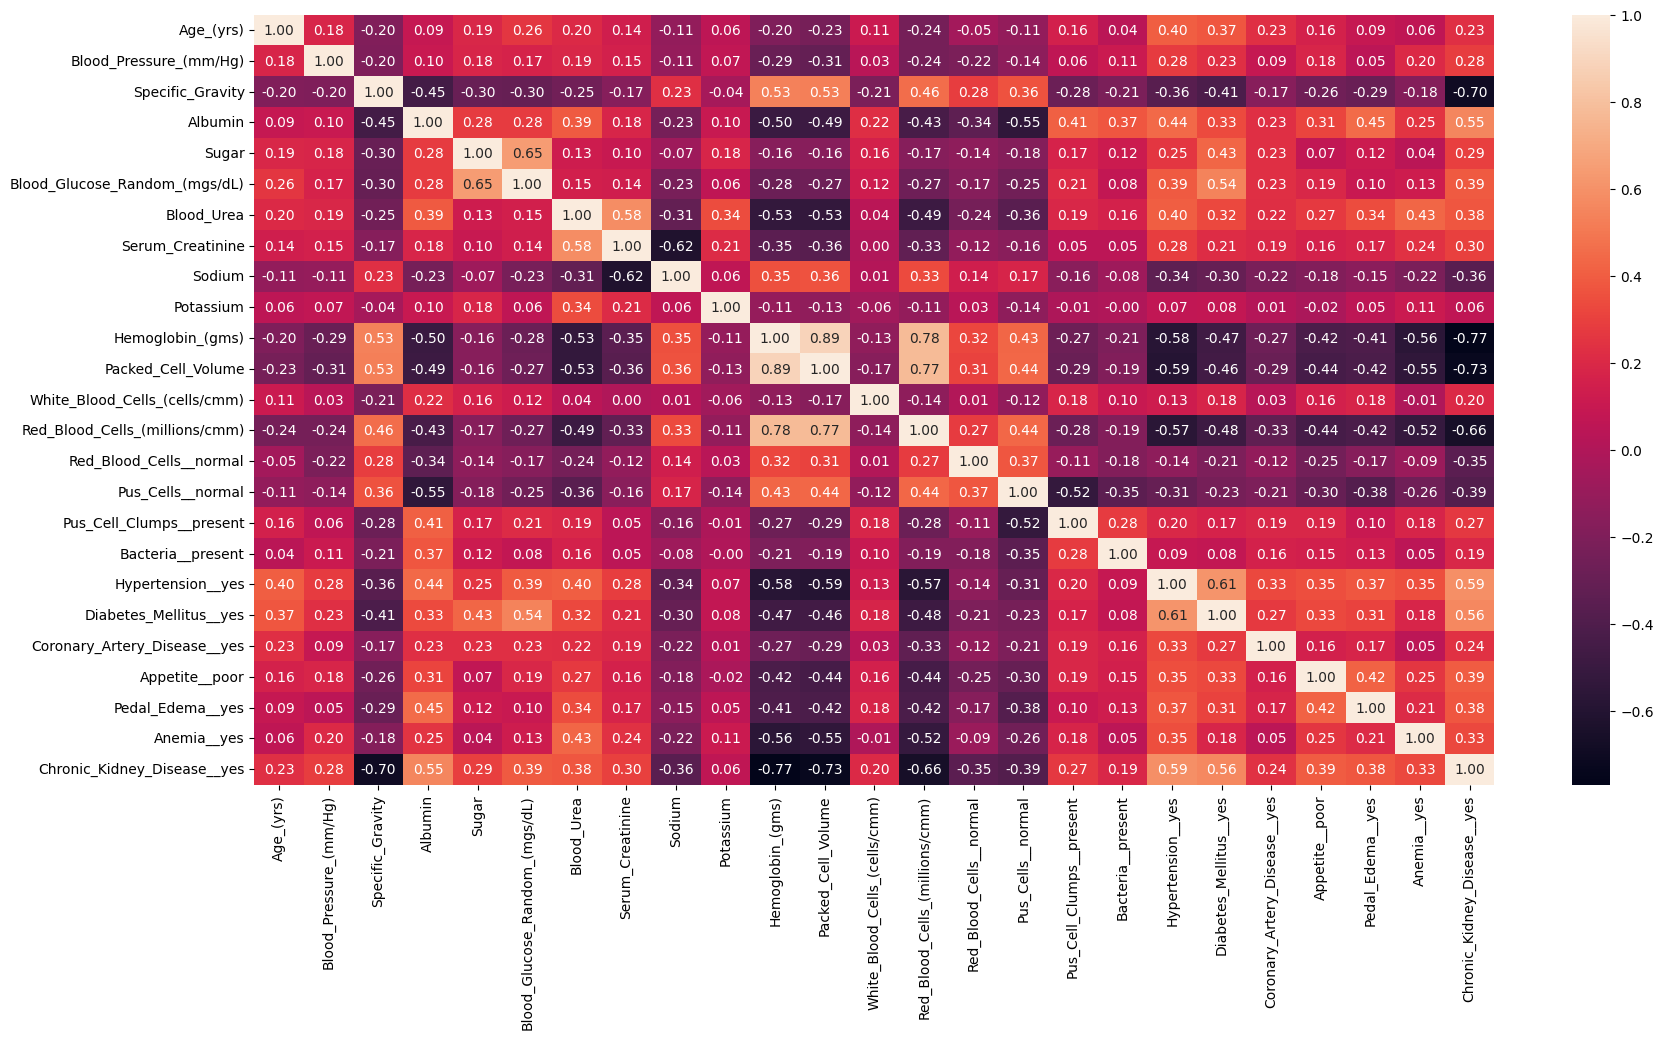

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

<Axes: >

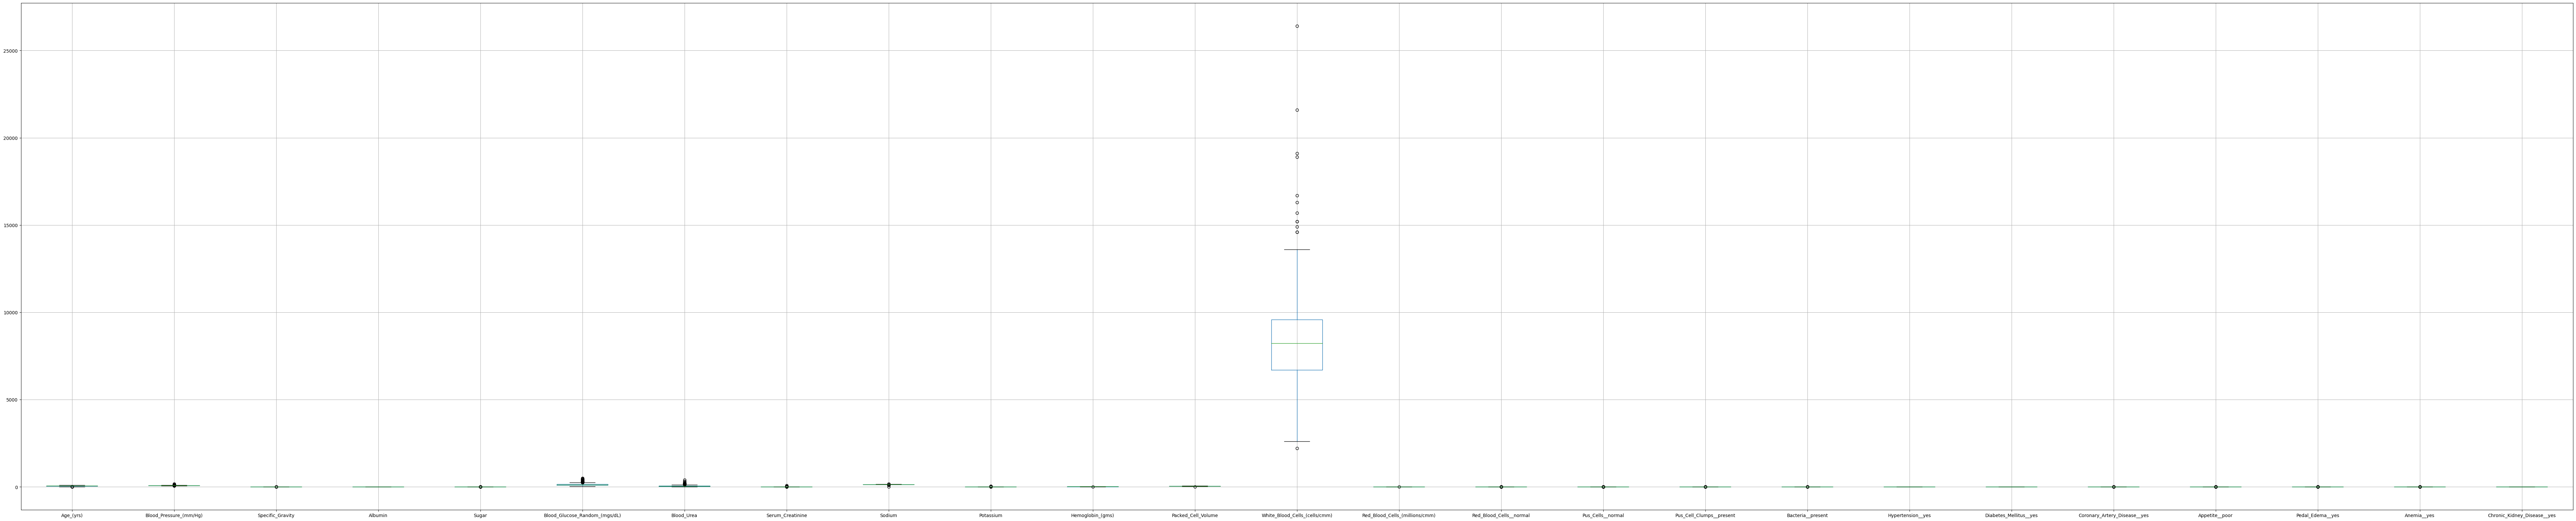

In [ ]:
df.boxplot(column=['Age_(yrs)','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Sugar','Blood_Glucose_Random_(mgs/dL)','Blood_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin_(gms)','Packed_Cell_Volume','White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)','Red_Blood_Cells__normal','Pus_Cells__normal','Pus_Cell_Clumps__present','Bacteria__present','Hypertension__yes','Diabetes_Mellitus__yes','Coronary_Artery_Disease__yes','Appetite__poor','Pedal_Edema__yes','Anemia__yes','Chronic_Kidney_Disease__yes'],figsize=(100,20))

In [ ]:
IQR=df['Age_(yrs)'].quantile(0.75)-df['Age_(yrs)'].quantile(0.25)
upperbound=df['Age_(yrs)'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Age_(yrs)'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

99.5 7.5


In [ ]:
df.loc[df['Age_(yrs)']>99.5,'Age_(yrs)']=99.5
df.loc[df['Age_(yrs)']<7.5,'Age_(yrs)']=7.5

In [ ]:
IQR=df['Blood_Pressure_(mm/Hg)'].quantile(0.75)-df['Blood_Pressure_(mm/Hg)'].quantile(0.25)
upperbound=df['Blood_Pressure_(mm/Hg)'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Blood_Pressure_(mm/Hg)'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

95.0 55.0


In [ ]:
df.loc[df['Blood_Pressure_(mm/Hg)']>95,'Blood_Pressure_(mm/Hg)']=95
df.loc[df['Blood_Pressure_(mm/Hg)']<55,'Blood_Pressure_(mm/Hg)']=55

In [ ]:
IQR=df['Specific_Gravity'].quantile(0.75)-df['Specific_Gravity'].quantile(0.25)
upperbound=df['Specific_Gravity'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Specific_Gravity'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

1.0275000000000003 1.0074999999999998


In [ ]:
df.loc[df['Specific_Gravity']>1.0275,'Specific_Gravity']=1.0275
df.loc[df['Specific_Gravity']<1.0075,'Specific_Gravity']=1.0075

In [ ]:
IQR=df['Sugar'].quantile(0.75)-df['Sugar'].quantile(0.25)
upperbound=df['Sugar'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Sugar'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

0.0 0.0


In [ ]:
df.loc[df['Sugar']>0.0,'Sugar']=0.0
df.loc[df['Sugar']<0.0,'Sugar']=0.0

In [ ]:
IQR=df['Blood_Glucose_Random_(mgs/dL)'].quantile(0.75)-df['Blood_Glucose_Random_(mgs/dL)'].quantile(0.25)
upperbound=df['Blood_Glucose_Random_(mgs/dL)'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Blood_Glucose_Random_(mgs/dL)'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

248.125 11.125


In [ ]:
df.loc[df['Blood_Glucose_Random_(mgs/dL)']>248.125,'Blood_Glucose_Random_(mgs/dL)']=248.125
df.loc[df['Blood_Glucose_Random_(mgs/dL)']<11.125,'Blood_Glucose_Random_(mgs/dL)']=11.125

In [ ]:
IQR=df['Blood_Urea'].quantile(0.75)-df['Blood_Urea'].quantile(0.25)
upperbound=df['Blood_Urea'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Blood_Urea'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

122.625 -30.375


In [ ]:
df.loc[df['Blood_Urea']>122.62500000000003,'Blood_Urea']=122.62500000000003
df.loc[df['Blood_Urea']<-30.37500000000002,'Blood_Urea']=-30.37500000000002

In [ ]:
IQR=df['White_Blood_Cells_(cells/cmm)'].quantile(0.75)-df['White_Blood_Cells_(cells/cmm)'].quantile(0.25)
upperbound=df['White_Blood_Cells_(cells/cmm)'].quantile(0.75)+1.5*(IQR)
lowerbound=df['White_Blood_Cells_(cells/cmm)'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

13892.850534999998 2384.2896790000013


In [ ]:
df.loc[df['White_Blood_Cells_(cells/cmm)']>13892.85,'White_Blood_Cells_(cells/cmm)']=13892.85
df.loc[df['White_Blood_Cells_(cells/cmm)']<2384.29,'White_Blood_Cells_(cells/cmm)']=2384.29

In [ ]:
IQR=df['Serum_Creatinine'].quantile(0.75)-df['Serum_Creatinine'].quantile(0.25)
upperbound=df['Serum_Creatinine'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Serum_Creatinine'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

5.6499999999999995 -1.9499999999999997


In [ ]:
df.loc[df['Serum_Creatinine']>5.65,'Serum_Creatinine']=5.65
df.loc[df['Serum_Creatinine']<-1.95,'Serum_Creatinine']=-1.95

In [ ]:
IQR=df['Sodium'].quantile(0.75)-df['Sodium'].quantile(0.25)
upperbound=df['Sodium'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Sodium'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

150.0 126.0


In [ ]:
df.loc[df['Sodium']>150,'Sodium']=150
df.loc[df['Sodium']<126,'Sodium']=126

In [ ]:
IQR=df['Potassium'].quantile(0.75)-df['Potassium'].quantile(0.25)
upperbound=df['Potassium'].quantile(0.75)+1.5*(IQR)
lowerbound=df['Potassium'].quantile(0.25)-1.5*(IQR)
print(upperbound,lowerbound)

6.400000000000001 2.3999999999999995


In [ ]:
df.loc[df['Potassium']>6.4,'Potassium']=6.4
df.loc[df['Potassium']<2.4,'Potassium']=2.4

<Axes: >

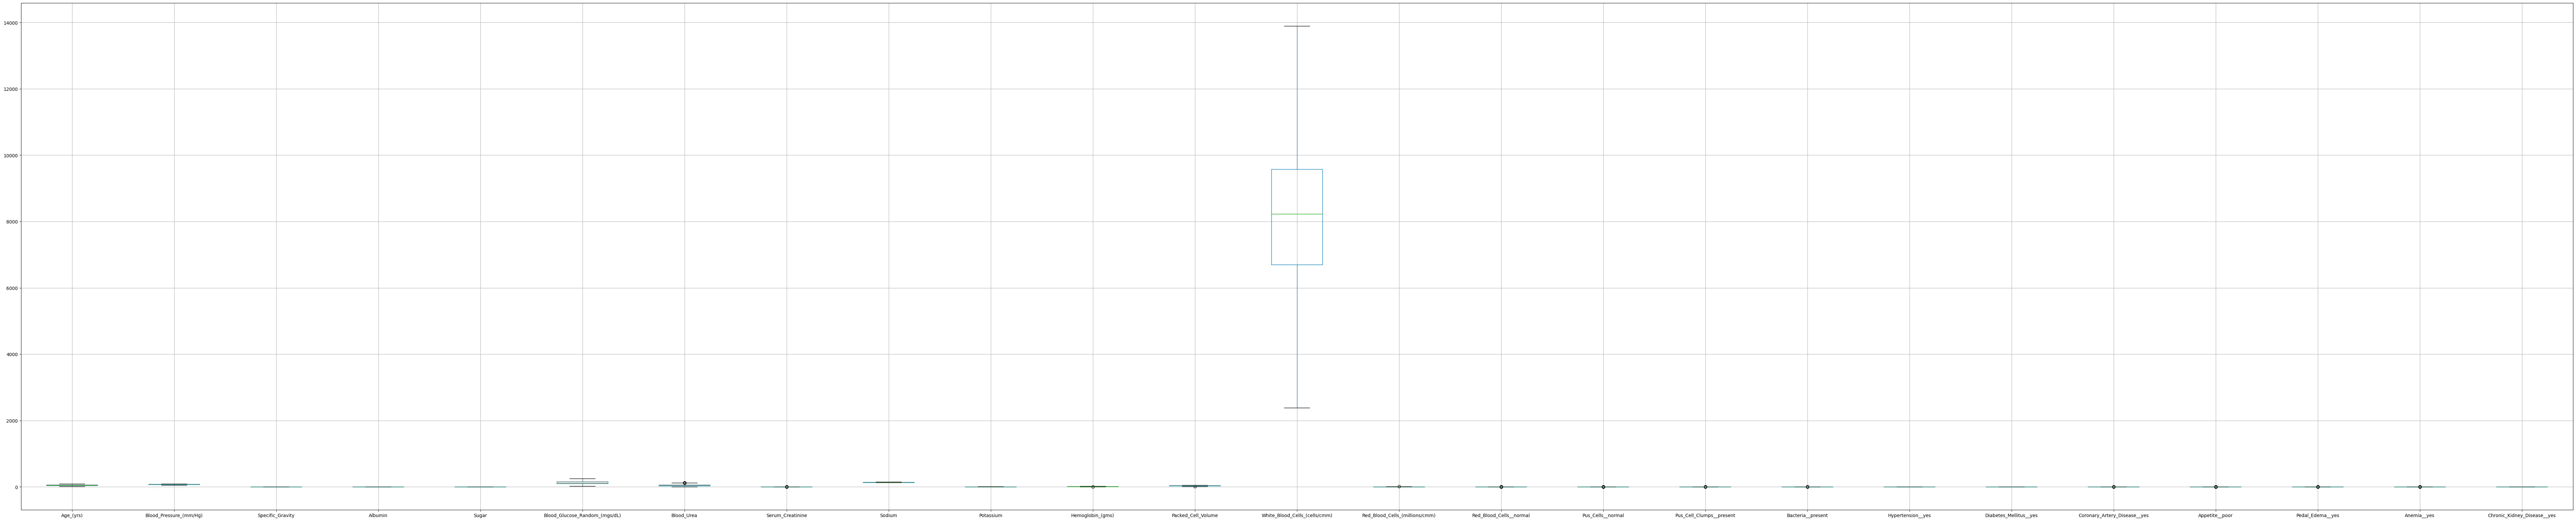

In [ ]:
df.boxplot(column=['Age_(yrs)','Blood_Pressure_(mm/Hg)','Specific_Gravity','Albumin','Sugar','Blood_Glucose_Random_(mgs/dL)','Blood_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin_(gms)','Packed_Cell_Volume','White_Blood_Cells_(cells/cmm)','Red_Blood_Cells_(millions/cmm)','Red_Blood_Cells__normal','Pus_Cells__normal','Pus_Cell_Clumps__present','Bacteria__present','Hypertension__yes','Diabetes_Mellitus__yes','Coronary_Artery_Disease__yes','Appetite__poor','Pedal_Edema__yes','Anemia__yes','Chronic_Kidney_Disease__yes'],figsize=(100,20))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df.drop(['Chronic_Kidney_Disease__yes'],axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,14.014740,Age_(yrs)
1,57.701455,Blood_Pressure_(mm/Hg)
2,1176.821298,Specific_Gravity
3,3.202303,Albumin
4,NaN,Sugar
5,12.751756,Blood_Glucose_Random_(mgs/dL)
6,12.022217,Blood_Urea
7,10.400751,Serum_Creatinine
8,1085.857893,Sodium
9,48.734369,Potassium


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
X_clf_new=SelectKBest(score_func=chi2,k=5).fit_transform(variables,df['Chronic_Kidney_Disease__yes'])
print(X_clf_new[:5])


[[1.00000000e+00 1.21000000e+02 3.60000000e+01 4.40000000e+01
  7.80000000e+03]
 [4.00000000e+00 9.03165812e+01 1.80000000e+01 3.80000000e+01
  6.00000000e+03]
 [2.00000000e+00 2.48125000e+02 5.30000000e+01 3.10000000e+01
  7.50000000e+03]
 [4.00000000e+00 1.17000000e+02 5.60000000e+01 3.20000000e+01
  6.70000000e+03]
 [2.00000000e+00 1.06000000e+02 2.60000000e+01 3.50000000e+01
  7.30000000e+03]]


In [ ]:
print(df.head())

   Age_(yrs)  Blood_Pressure_(mm/Hg)  Specific_Gravity  Albumin  Sugar  \
0       48.0                      80            1.0200      1.0      0   
1        7.5                      55            1.0200      4.0      0   
2       62.0                      80            1.0100      2.0      0   
3       48.0                      70            1.0075      4.0      0   
4       51.0                      80            1.0100      2.0      0   

   Blood_Glucose_Random_(mgs/dL)  Blood_Urea  Serum_Creatinine  Sodium  \
0                     121.000000        36.0               1.2   136.0   
1                      90.316581        18.0               0.8   140.0   
2                     248.125000        53.0               1.8   135.0   
3                     117.000000        56.0               3.8   126.0   
4                     106.000000        26.0               1.4   140.0   

   Potassium  ...  Pus_Cells__normal  Pus_Cell_Clumps__present  \
0        4.7  ...                  1        

In [ ]:
#X=df.drop(['Chronic_Kidney_Disease__yes','Specific_Gravity','Sodium_(mEq/L)','Packed_Cell_Volume','Red_Blood_Cells_(millions/cmm)','White_Blood_Cells_(cells/cmm)','Blood_Pressure_(mm/Hg)','Hemoglobin_(gms)'],axis=1)
X=df[['Albumin','Blood_Urea','Serum_Creatinine','Sodium','Potassium']]
y= df['Chronic_Kidney_Disease__yes']
from sklearn import metrics
from sklearn.model_selection  import train_test_split
#from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# X_res,y_res = smote.fit_resample(X,y)
# X_train,X_test,y_train,y_test=train_test_split(X_res,y_res, test_size=0.01, random_state=42)
# from collections import Counter
# print("Before SMOTE: ",Counter(y_train))
# print("After SMOTE: ",Counter(y_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Testing accuracy: 0.9625


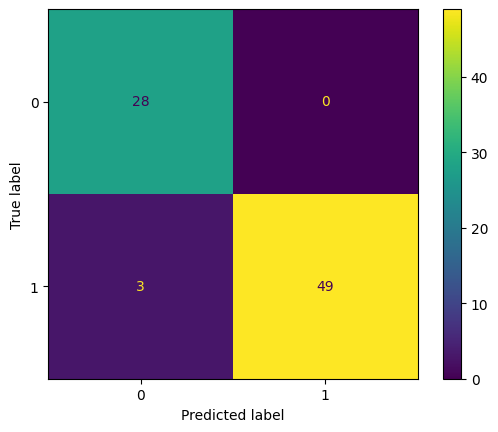

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Testing accuracy: 0.9625


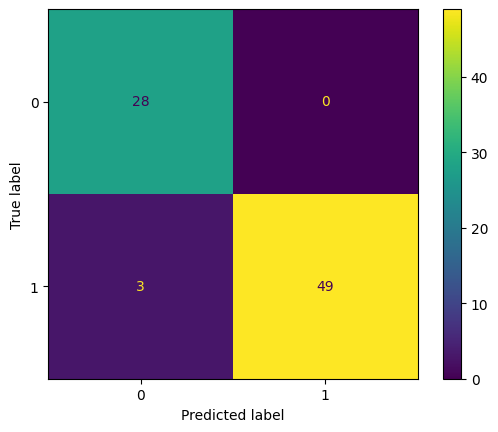

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.98      0.94      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

Testing accuracy: 0.95


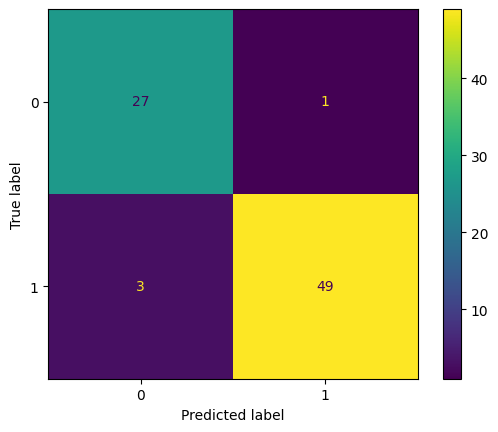

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm
model1 = svm.SVC(gamma='auto', probability=True)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)
print(metrics.classification_report(y_test,y_pred,labels=[0,1]))
#print("Training accuracy",metrics.accuracy_score(y_train,y_pred_train))
print("Testing accuracy:",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

Testing accuracy: 0.9625


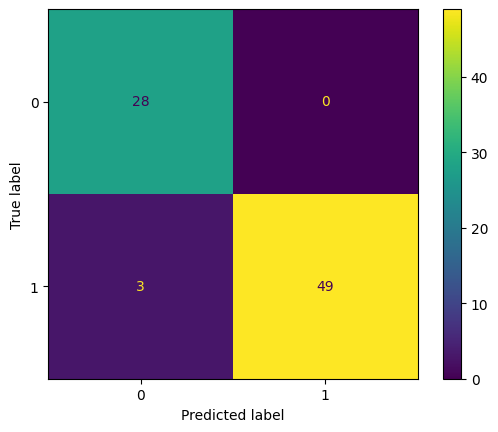

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
ctb= CatBoostClassifier()

In [ ]:
ctb.fit(X_train, y_train)

Learning rate set to 0.006333
0:	learn: 0.6848666	total: 1.46ms	remaining: 1.46s
1:	learn: 0.6752501	total: 2.45ms	remaining: 1.22s
2:	learn: 0.6659736	total: 3.31ms	remaining: 1.1s
3:	learn: 0.6567235	total: 3.98ms	remaining: 992ms
4:	learn: 0.6496019	total: 4.91ms	remaining: 978ms
5:	learn: 0.6396186	total: 5.64ms	remaining: 935ms
6:	learn: 0.6304175	total: 6.59ms	remaining: 935ms
7:	learn: 0.6234447	total: 7.57ms	remaining: 938ms
8:	learn: 0.6141814	total: 8.51ms	remaining: 937ms
9:	learn: 0.6055799	total: 9.29ms	remaining: 919ms
10:	learn: 0.5968035	total: 10.1ms	remaining: 904ms
11:	learn: 0.5893705	total: 11ms	remaining: 903ms
12:	learn: 0.5816792	total: 11.8ms	remaining: 900ms
13:	learn: 0.5744661	total: 12.7ms	remaining: 897ms
14:	learn: 0.5681707	total: 13.6ms	remaining: 894ms
15:	learn: 0.5607651	total: 14.6ms	remaining: 898ms
16:	learn: 0.5546060	total: 16.2ms	remaining: 940ms
17:	learn: 0.5465694	total: 16.7ms	remaining: 908ms
18:	learn: 0.5412746	total: 17.5ms	remaining: 9

In [ ]:
y_pred = ctb.predict(X_test)

In [ ]:
ctb.score(X_test,y_test)

0.9625

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.9423076923076923

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9702970297029703

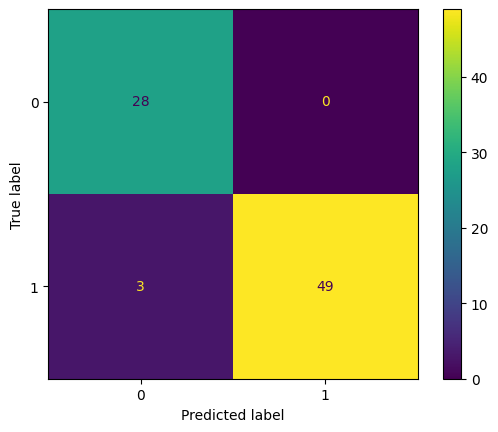

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc= AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101), n_estimators=100, learning_rate=0.01)

In [ ]:
abc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                   learning_rate=0.01, n_estimators=100, random_state=96)

In [ ]:
y_pred = abc.predict(X_test)

In [ ]:
abc.score(X_test,y_test)

0.9625

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



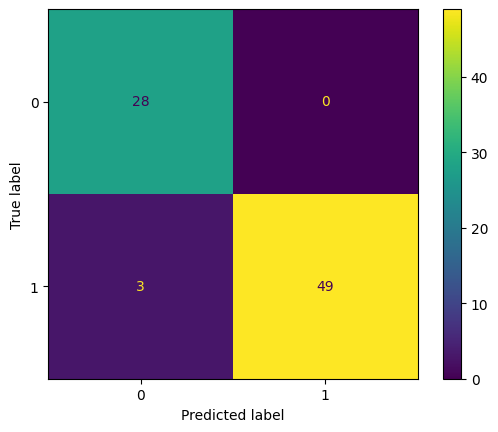

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
import lightgbm as lgb
lb = lgb.LGBMClassifier()
lb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 198, number of negative: 122
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618750 -> initscore=0.484246
[LightGBM] [Info] Start training from score 0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier()

In [ ]:
y_pred = lb.predict(X_test)

In [ ]:
lb.score(X_test,y_test)

0.95

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.98      0.94      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



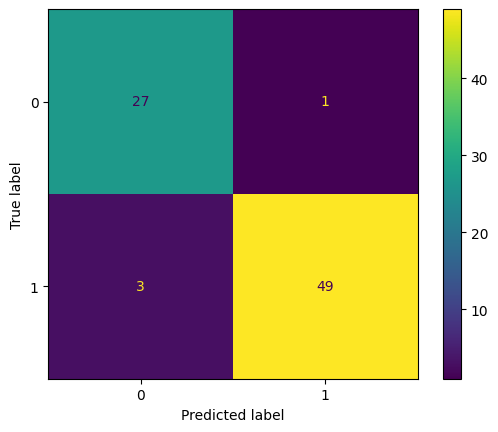

In [ ]:
from sklearn import metrics
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10)
folds.get_n_splits(X)
def get_score(model):
  for train_index, test_index in folds.split(X):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)


In [ ]:
#final_data = pd.DataFrame({'Models': ['LR','RFC','XGB','SVC','CB','AB','LGB'], 'Accuracy' : [get_score(LogisticRegression())*100,get_score(RandomForestClassifier())*100,get_score(XGBClassifier())*100,get_score(svm.SVC(gamma='auto', probability=True))*100,get_score(CatBoostClassifier())*100,get_score(AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101), n_estimators=100, learning_rate=0.01))*100,get_score(lgb.LGBMClassifier())*100]})
final_data = pd.DataFrame({'Models': ['RFC','LGB','CB','ADB'], 'Accuracy' : [get_score(RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features='log2',max_depth=15,bootstrap=False))*100,get_score(lgb.LGBMClassifier())*100,get_score(CatBoostClassifier())*100,get_score(AdaBoostClassifier())*100]})
final_data

[LightGBM] [Info] Number of positive: 198, number of negative: 122
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618750 -> initscore=0.484246
[LightGBM] [Info] Start training from score 0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

,Models,Accuracy
0,RFC,96.25
1,LGB,95.00
2,CB,96.25
3,ADB,96.25


<Axes: xlabel='Models', ylabel='Accuracy'>

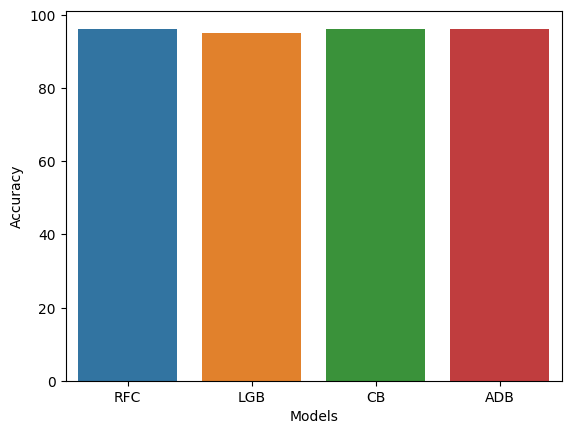

In [ ]:
sns.barplot(x = final_data['Models'],y = final_data['Accuracy'])

In [ ]:
import pickle

In [ ]:
filename = 'kidney_model.sav'
pickle.dump(ctb, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('kidney_model.sav','rb'))